# ANALYTICS VIDHYA-JOB-A-THON

## Jayadeva Javali
### jayadevajavali8@gmail.com

## Importing Libraries

In [82]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

## Basic Information on the data

In [2]:
path=r'C:\Users\JAYADEVA JAVALI\Desktop\AV\TRAIN.csv'
path1=r'C:\Users\JAYADEVA JAVALI\Desktop\AV\TEST_FINAL.csv'
train=pd.read_csv(path)
test=pd.read_csv(path1)

In [3]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
train.shape

(188340, 10)

In [6]:
test.shape

(22265, 8)

In [9]:
train.info(),test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   S

(None, None)

In [14]:
train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [32]:
train.describe(include='O')

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
count,188340,188340,188340,188340,188340,188340
unique,188340,4,5,4,516,2
top,T1051393,S1,L1,R1,2018-10-28,No
freq,1,88752,85140,63984,365,104051


In [31]:
test.describe()

,Store_id,Holiday
count,22265.000000,22265.000000
mean,183.000000,0.032787
std,105.368395,0.178082
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.000000
max,365.000000,1.000000


In [33]:
test.describe(include='O')

,ID,Store_Type,Location_Type,Region_Code,Date,Discount
count,22265,22265,22265,22265,22265,22265
unique,22265,4,5,4,61,2
top,T1202786,S1,L1,R1,2019-07-12,No
freq,1,10492,10065,7564,365,12773


## High Level Information on the data

In [16]:
train.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [21]:
if train.isnull().sum().any() == False:
    print("There are no missing values")
else:
    print("There are missing values")

There are no missing values


In [17]:
test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [22]:
if test.isnull().sum().any() == False:
    print("There are no missing values")
else:
    print("There are missing values")

There are no missing values


In [18]:
#categorical features
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 6
Numerical Features in Train Set: 4


In [19]:
#categorical features
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

#numerical features
numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 6
Numerical Features in Test Set: 2


In [25]:
# Checking for duplicate rows
print("number of duplicate rows in train set: ", train.duplicated().sum())

number of duplicate rows in train set:  0


In [24]:
# Checking for duplicate rows
print("number of duplicate rows in test set: ", test.duplicated().sum())

number of duplicate rows in test set:  0


In [26]:
train.corr()

,Store_id,Holiday,#Order,Sales
Store_id,1.000000e+00,-4.477583e-19,0.028290,0.004377
Holiday,-4.477583e-19,1.000000e+00,-0.140496,-0.154779
#Order,2.828985e-02,-1.404963e-01,1.000000,0.941601
Sales,4.376631e-03,-1.547788e-01,0.941601,1.000000


<AxesSubplot:>

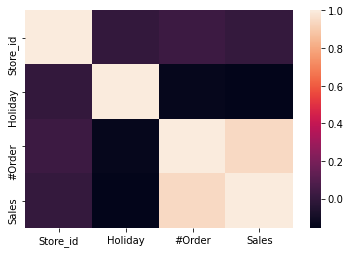

In [34]:
sns.heatmap(train.corr())

In [27]:
test.corr()

,Store_id,Holiday
Store_id,1.000000e+00,-5.400071e-19
Holiday,-5.400071e-19,1.000000e+00


<AxesSubplot:>

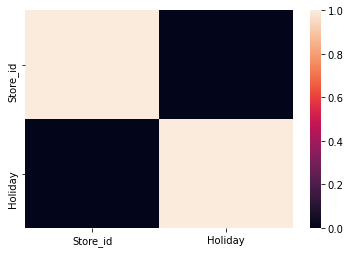

In [35]:
sns.heatmap(test.corr())

## Checking for Outliers

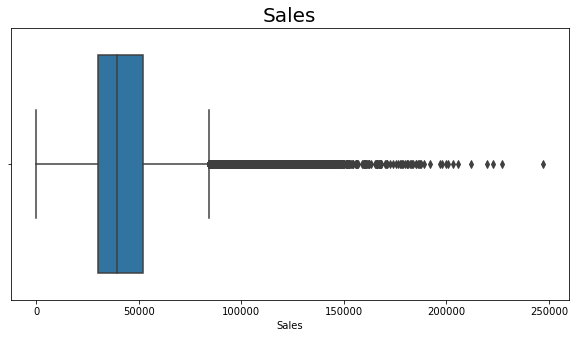

In [39]:
for c in ['Sales']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(train[c])
    plt.title(c, fontsize=20)
    plt.show()

In [37]:
def detect_outlier(col):
    quartile1 = col.quantile(0.25)
    quartile3 = col.quantile(0.75)
    IQR = quartile3 - quartile1
    lower = quartile1 - (1.5 * IQR)
    upper = quartile3 +  (1.5 * IQR)
    return lower, upper

col1=train['Sales']
print("Outliers of Sales")
detect_outlier(col1)

Outliers of Sales


(-1798.5, 84133.5)

#### These are Absurd Values so imputing outliers is not a good idea.

In [41]:
print(train['Store_Type'].value_counts())
print('******************************************')
print(test['Store_Type'].value_counts())

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64
******************************************
S1    10492
S4     5429
S2     3416
S3     2928
Name: Store_Type, dtype: int64


In [43]:
print(train['Location_Type'].value_counts())
print('******************************************')
print(test['Location_Type'].value_counts())

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64
******************************************
L1    10065
L2     5734
L3     3538
L5     1647
L4     1281
Name: Location_Type, dtype: int64


In [44]:
print(train['Region_Code'].value_counts())
print('******************************************')
print(test['Region_Code'].value_counts())

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64
******************************************
R1    7564
R2    6405
R3    5246
R4    3050
Name: Region_Code, dtype: int64


In [45]:
print(train['Discount'].value_counts())
print('******************************************')
print(test['Discount'].value_counts())

No     104051
Yes     84289
Name: Discount, dtype: int64
******************************************
No     12773
Yes     9492
Name: Discount, dtype: int64


## Data Visualisation on Train Data

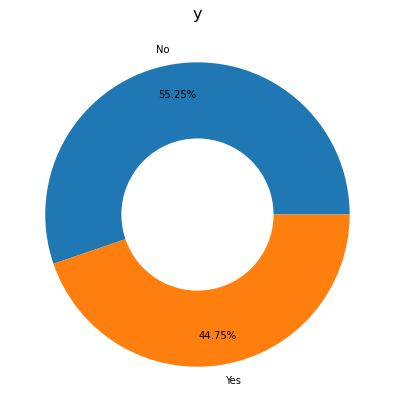

In [46]:
train_1 = train["Discount"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = train_1, x = train_1.values, labels = train_1.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Discount", size = 16)
plt.show()

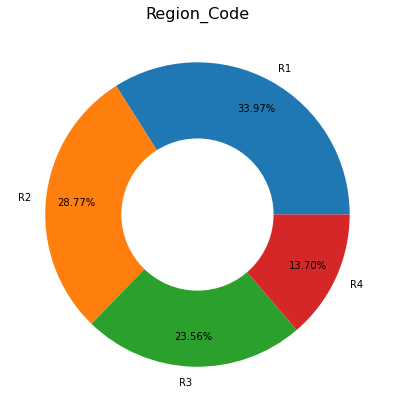

In [57]:
train_2 = train['Region_Code'].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = train_2, x = train_2.values, labels = train_2.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Region_Code", size = 16)
plt.show()

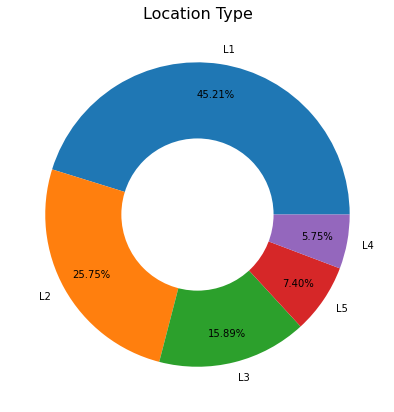

In [58]:
train_3 = train['Location_Type'].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = train_3, x = train_3.values, labels = train_3.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Location Type", size = 16)
plt.show()

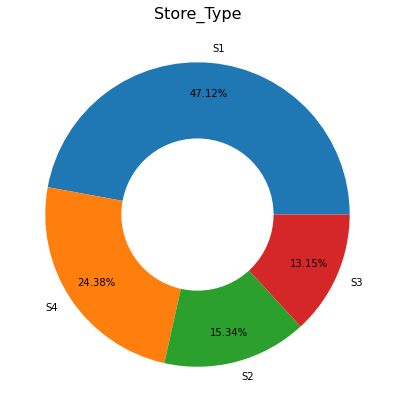

In [59]:
train_4 = train['Store_Type'].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = train_4, x = train_4.values, labels = train_4.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Store_Type", size = 16)
plt.show()

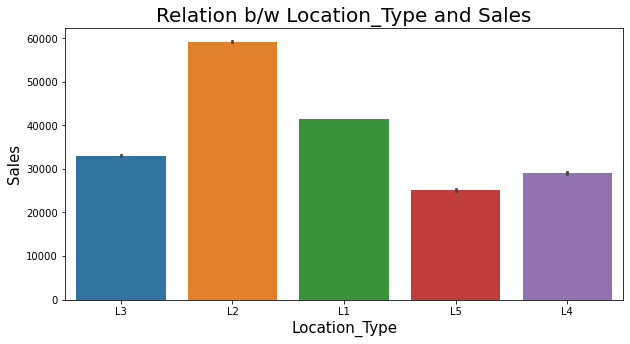

In [65]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Location_Type', y='Sales', data=train)
plt.title('Relation b/w Location_Type and Sales', fontsize=20);
plt.xlabel('Location_Type', fontsize=15)
plt.ylabel('Sales', fontsize=15);

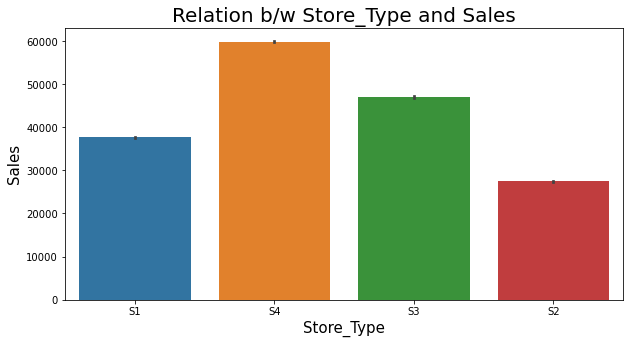

In [52]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Store_Type', y='Sales', data=train)
plt.title('Relation b/w Store_Type and Sales', fontsize=20);
plt.xlabel('Store_Type', fontsize=15)
plt.ylabel('Sales', fontsize=15);

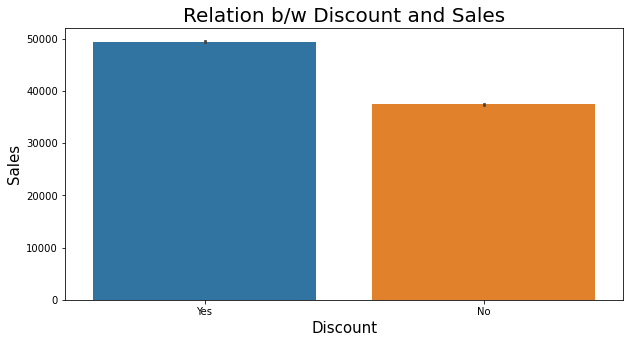

In [54]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Discount', y='Sales', data=train)
plt.title('Relation b/w Discount and Sales', fontsize=20);
plt.xlabel('Discount', fontsize=15)
plt.ylabel('Sales', fontsize=15);

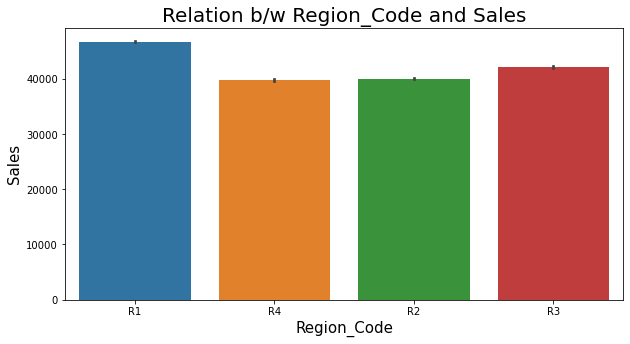

In [56]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Region_Code', y='Sales', data=train)
plt.title('Relation b/w Region_Code and Sales', fontsize=20);
plt.xlabel('Region_Code', fontsize=15)
plt.ylabel('Sales', fontsize=15);

<AxesSubplot:xlabel='Sales', ylabel='Location_Type'>

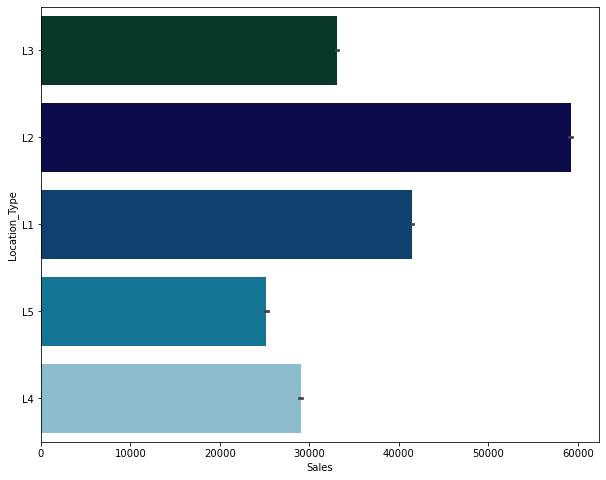

In [67]:
plt.figure(figsize=(10,8))
sns.barplot(y='Location_Type',x='Sales',data=train,palette='ocean')

## Data Visualization of Test Data

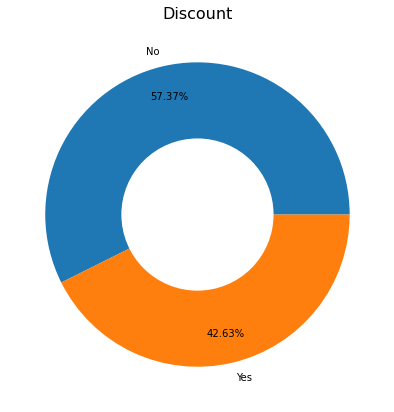

In [47]:
test_1 = test["Discount"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = test_1, x = test_1.values, labels = test_1.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Discount", size = 16)
plt.show()

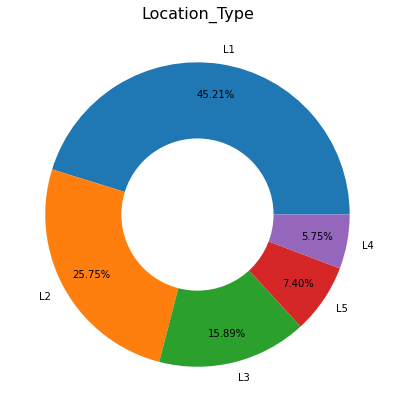

In [60]:
test_2 = test["Location_Type"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = test_2, x = test_2.values, labels = test_2.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Location_Type", size = 16)
plt.show()

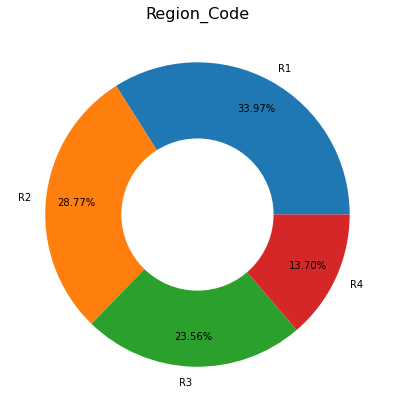

In [61]:
test_3 = test["Region_Code"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = test_3, x = test_3.values, labels = test_3.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Region_Code", size = 16)
plt.show()

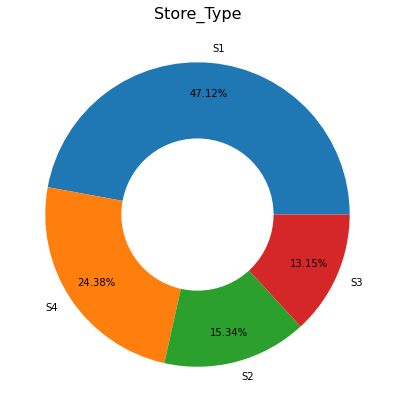

In [62]:
test_4 = test["Store_Type"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = test_4, x = test_4.values, labels = test_4.index, autopct = "%.2f%%", pctdistance = 0.8 )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("Store_Type", size = 16)
plt.show()

## Data Pre-Processing

### Label Encoding

In [69]:
label_RC = LabelEncoder()
label_LT = LabelEncoder()
label_ST = LabelEncoder()
label_D  = LabelEncoder()


train['Region_Code'] = label_RC.fit_transform(train['Region_Code'])
train['Location_Type'] = label_LT.fit_transform(train['Location_Type'])
train['Store_Type'] = label_ST.fit_transform(train['Store_Type'])
train['Discount'] = label_D.fit_transform(train['Discount'])

In [70]:
train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,0,2,0,2018-01-01,1,1,9,7011.84
1,T1000002,253,3,1,0,2018-01-01,1,1,60,51789.12
2,T1000003,252,2,1,0,2018-01-01,1,1,42,36868.20
3,T1000004,251,1,2,0,2018-01-01,1,1,23,19715.16
4,T1000005,250,1,2,3,2018-01-01,1,1,62,45614.52


In [71]:
label_RC1 = LabelEncoder()
label_LT1 = LabelEncoder()
label_ST1 = LabelEncoder()
label_D1 = LabelEncoder()


test['Region_Code'] = label_RC1.fit_transform(test['Region_Code'])
test['Location_Type'] = label_LT1.fit_transform(test['Location_Type'])
test['Store_Type'] = label_ST1.fit_transform(test['Store_Type'])
test['Discount'] = label_D1.fit_transform(test['Discount'])

In [72]:
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,3,1,2,2019-06-01,0,0
1,T1188342,172,0,0,0,2019-06-01,0,0
2,T1188343,173,3,1,0,2019-06-01,0,0
3,T1188344,174,0,0,3,2019-06-01,0,0
4,T1188345,170,0,0,1,2019-06-01,0,0


# Model Building 

In [163]:
train = train.select_dtypes(exclude='object')
test = test.select_dtypes(exclude='object')

In [164]:
x = train.drop(["Sales"], axis = 1).copy()
y = train["Sales"].copy()

In [165]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=40)

## 1.Linear Regression

In [166]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)
rmse_Lreg = np.sqrt(mean_squared_error(y_test, prediction))
print('RMSE value is = {}'.format(rmse_Lreg))
r2_Lreg = r2_score(y_test, prediction)
print('R-squared value is {}'.format(r2_Lreg))

RMSE value is = 5523.809792021703
R-squared value is 0.9105052362413247


In [167]:
features= x.columns
LR = LinearRegression(normalize=True)
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
coef = pd.Series(LR.coef_,features).sort_values()


<AxesSubplot:>

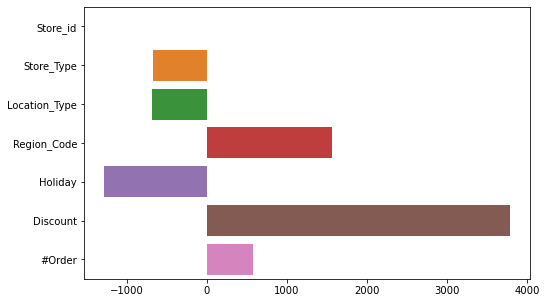

In [168]:
# Barplot for coefficients
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

In [177]:
submission=pd.read_excel(r'C:\Users\JAYADEVA JAVALI\Desktop\sub.csv')

In [179]:
submission=pd.read_excel(r'C:\Users\JAYADEVA JAVALI\Desktop\sub.csv',header=None)

In [180]:
submission['Sales']=y_pred

In [181]:
submission.head()

,Sales
0,46483.253508
1,34621.663614
2,37429.558698
3,26578.515559
4,24843.749720


In [182]:
submission.to_csv(r'C:\Users\JAYADEVA JAVALI\Desktop\AV\submission.csv')

## 2.Random Forest Regressor

In [185]:
RFreg_model = RandomForestRegressor()
RFreg_model.fit(x_train,y_train)
prediction2 = RFreg_model.predict(x_test)
rmse_RFreg = np.sqrt(mean_squared_error(y_test, prediction2))
print('RMSE value is = {}'.format(rmse_RFreg))
r2_RFreg = r2_score(y_test, prediction2)
print('R-squared value is {}'.format(r2_RFreg))

RMSE value is = 4542.179580098943
R-squared value is 0.9394869844264035


## 3.Polynomial Regressor

In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
prediction3 = regressor.predict(poly_reg.transform(x_test))

ploy_reg = np.sqrt(mean_squared_error(y_test, prediction3))
print('RMSE value is = {}'.format(ploy_reg))
r2_poly_reg = r2_score(y_test, prediction3)
print('R-squared value is {}'.format(r2_poly_reg))

RMSE value is = 4679.009556424654
R-squared value is 0.9357862461110387


## 4.Decision Tree Regressor

In [85]:
regressor1 = DecisionTreeRegressor(random_state = 0)
regressor1.fit(x_train, y_train)
prediction4 = regressor1.predict(x_test)
dt_reg = np.sqrt(mean_squared_error(y_test, prediction4))
print('RMSE value is = {}'.format(dt_reg))
r2_dt_reg = r2_score(y_test, prediction4)
print('R-squared value is {}'.format(r2_dt_reg))

RMSE value is = 5069.780276435869
R-squared value is 0.9246126513183084


## 5.XGBoost Regressor

In [87]:
SEED=42
xgbr = XGBRegressor(learning_rate = 0.1, n_estimators = 200, random_state = SEED)
xgbr.fit(x_train,y_train)
prediction5 = xgbr.predict(x_test)
xgbr_reg = np.sqrt(mean_squared_error(y_test, prediction5))
print('RMSE value is = {}'.format(xgbr_reg))
r2_xgbr_reg = r2_score(y_test, prediction5)
print('R-squared value is {}'.format(r2_xgbr_reg))

RMSE value is = 4138.711008580953
R-squared value is 0.9497599110957692


## Comparision of Models 

In [127]:
Result= pd.DataFrame({'Actual Sales':y_test,'Predicted Sales By LinearRegression':prediction,'Predicted Sales By RandomForest':prediction2,'Predicted Sales By PolynomialRegressor':prediction3,'Predicted Sales By DecisionTreeRegressor':prediction4,'Predicted Sales By XgbRegressor':prediction5})
Result

,Actual Sales,Predicted Sales By LinearRegression,Predicted Sales By RandomForest,Predicted Sales By PolynomialRegressor,Predicted Sales By DecisionTreeRegressor,Predicted Sales By XgbRegressor
152226,42081.00,46483.253508,45455.908857,46399.746490,45153.000000,46823.722656
48745,40770.00,34621.663614,36590.550900,39081.422135,33951.000000,38313.996094
24500,33114.00,37429.558698,33779.663953,34772.163666,33778.875000,33878.882812
83014,25473.00,26578.515559,27802.869512,30002.329504,27688.125000,27431.626953
20636,27315.00,24843.749720,27274.860734,23935.380782,27529.800000,25344.269531
...,...,...,...,...,...,...
132413,57468.00,46437.266896,47775.506563,46491.961633,47600.250000,47615.242188
112141,37380.00,39133.736025,37505.966571,37713.517960,37562.000000,38806.707031
91253,45378.00,35310.682633,44278.077363,42003.971119,44344.285714,44613.464844
58406,69534.00,63393.828063,65304.075400,65347.895159,65787.000000,62493.707031
